In [1]:
# importing all the required libraries

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data = data.assign(target=pd.Series(cancer.target))
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
## Independent features and dependent features
X=data.iloc[:,:-1]  
y=data.iloc[:,-1]

In [7]:
## train test split 
from sklearn.model_selection import train_test_split

# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)

In [9]:
from sklearn.model_selection import GridSearchCV
parameter=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}]

In [10]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
KNNReg = GridSearchCV(estimator = KNN,
                  param_grid = parameter,
                  scoring = "accuracy", #sklearn.metrics.SCORERS.keys()
                  cv = 5,
                  verbose = 4)

In [11]:
KNNReg.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.953, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.918, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.929, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.918, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.871, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.953, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.929, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.835, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.965, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.918, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.918, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.941, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.859, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}],
             scoring='accuracy', verbose=4)

In [12]:
print(KNNReg.best_params_)

{'n_neighbors': 10}


In [13]:
print(KNNReg.best_score_)

0.9247606019151846


In [14]:
df = pd.DataFrame(KNNReg.cv_results_)
df = df.sort_values("rank_test_score")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.007763,0.002079,0.011328,0.002086,10,{'n_neighbors': 10},0.976744,0.905882,0.917647,0.952941,0.870588,0.924761,0.036981,1
6,0.007945,0.001483,0.010724,0.002985,9,{'n_neighbors': 9},0.976744,0.905882,0.929412,0.941176,0.858824,0.922408,0.039166,2
2,0.012602,0.004541,0.013403,0.002584,5,{'n_neighbors': 5},0.965116,0.917647,0.917647,0.941176,0.858824,0.920082,0.035320,3
4,0.013498,0.001524,0.036978,0.008440,7,{'n_neighbors': 7},0.976744,0.905882,0.929412,0.941176,0.847059,0.920055,0.043074,4
0,0.008798,0.002637,0.011211,0.003700,3,{'n_neighbors': 3},0.953488,0.917647,0.929412,0.917647,0.870588,0.917756,0.026972,5
3,0.010104,0.002465,0.019202,0.008277,6,{'n_neighbors': 6},0.941860,0.905882,0.929412,0.929412,0.870588,0.915431,0.025265,6
5,0.011144,0.001559,0.015721,0.004928,8,{'n_neighbors': 8},0.953488,0.905882,0.929412,0.941176,0.847059,0.915404,0.037610,7
1,0.008601,0.001497,0.014000,0.002966,4,{'n_neighbors': 4},0.953488,0.905882,0.941176,0.929412,0.835294,0.913051,0.041932,8


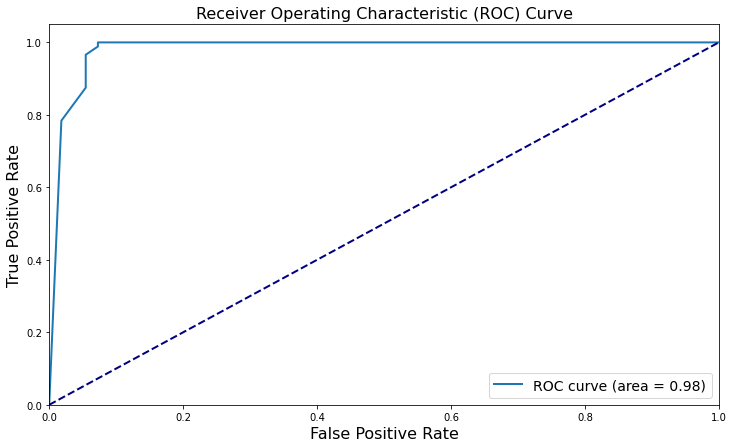

In [15]:
# Compute the predicted probabilities and the ROC curve
y_proba = KNNReg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax.plot(fpr, tpr, lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate", fontsize=16)
ax.set_ylabel("True Positive Rate", fontsize=16)
ax.set_title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
ax.legend(loc="lower right", fontsize=14)


In [16]:
##prediction
y_pred=KNNReg.predict(x_test)

In [17]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [18]:
score=accuracy_score(y_pred,y_test)
print(score)

0.972027972027972


In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.96      0.98        92

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

